# Predicting Customer Churn 

In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

In [35]:
df = pd.read_csv(r"C:\Users\Knigh\OneDrive\Desktop\DATA\Kaggle\Churn Prediction\customer_churn_data.csv")

df.head(5)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [36]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [38]:
#drop customer id - irrevant for this customer churn predicting project 

In [39]:
df = df.drop(columns='CustomerID',axis=1)

In [40]:
df.head()

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [41]:
df.shape

(1000, 9)

In [42]:
df.isna().sum()

Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [43]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    395
DSL            308
Name: count, dtype: int64

## Fill with Fiber Optic since it is most used and even though double it by 297 values it will still not have an affect on the ML Model

In [44]:
df['InternetService'] = df['InternetService'].fillna('Fiber Optic')

In [45]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    692
DSL            308
Name: count, dtype: int64

In [46]:
df.isna().sum()

Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
df.nunique()

Age                 57
Gender               2
Tenure              87
MonthlyCharges     935
ContractType         3
InternetService      2
TotalCharges       943
TechSupport          2
Churn                2
dtype: int64

# EDA 

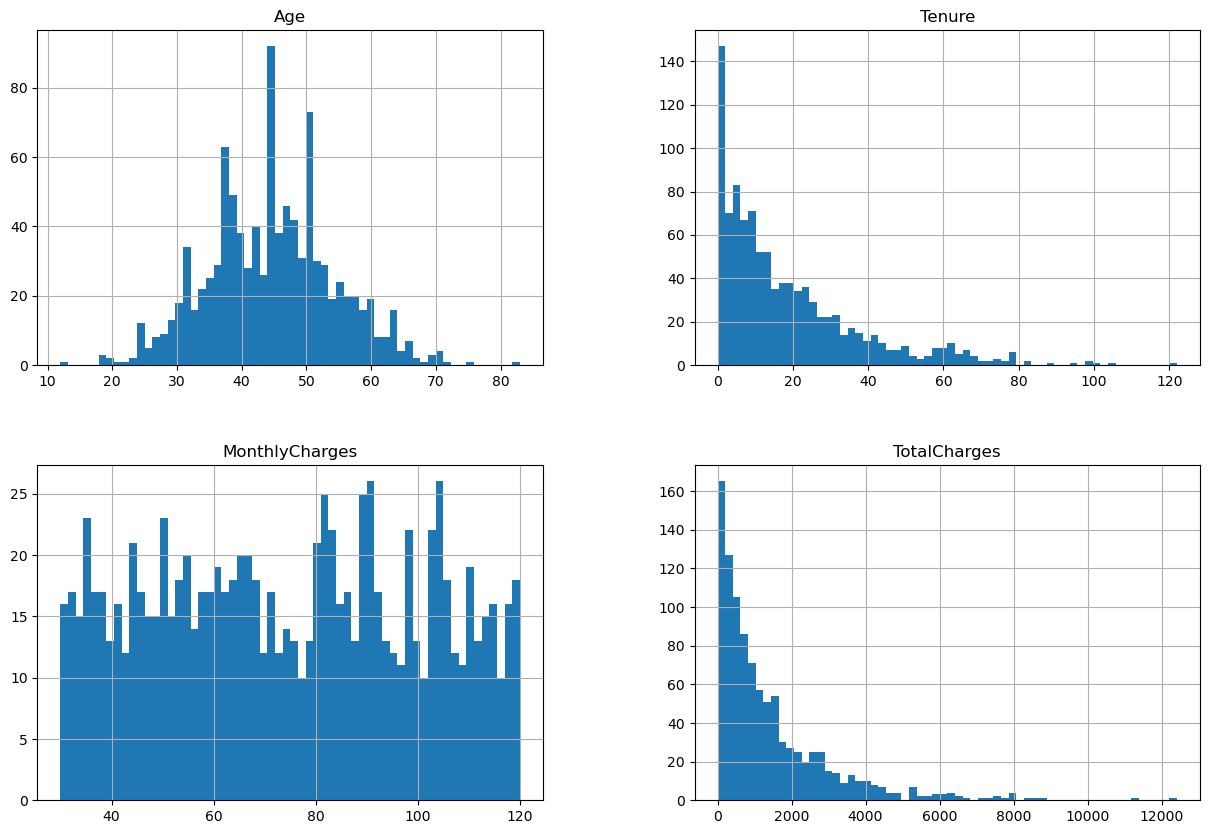

In [49]:
df.hist(bins=60, figsize = (15,10)) 
plt.show()

In [50]:
df[df['Tenure']>81]

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
18,35,Male,98,49.59,Two-Year,Fiber Optic,4859.82,Yes,No
112,45,Female,88,51.73,Month-to-Month,Fiber Optic,4552.24,Yes,Yes
136,37,Female,82,98.11,Month-to-Month,Fiber Optic,8045.02,No,Yes
164,54,Male,101,54.78,Month-to-Month,Fiber Optic,5532.78,No,Yes
233,38,Female,122,69.58,Month-to-Month,DSL,8488.76,No,Yes
440,48,Male,94,89.57,One-Year,Fiber Optic,8419.58,No,Yes
493,36,Female,105,118.25,Month-to-Month,DSL,12416.25,Yes,Yes
540,53,Male,99,113.93,Month-to-Month,Fiber Optic,11279.07,No,Yes
631,60,Female,83,89.36,Month-to-Month,Fiber Optic,7416.88,Yes,Yes


<Axes: xlabel='Tenure'>

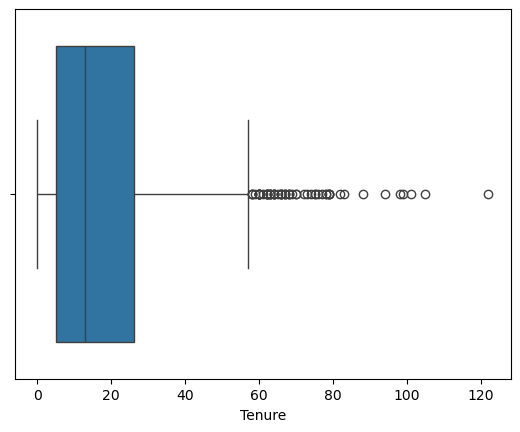

In [51]:
sns.boxplot(x=df['Tenure']) #Maybe drop rows > 60

In [52]:
df.corr(numeric_only=True).style.background_gradient()

,Age,Tenure,MonthlyCharges,TotalCharges
Age,1.000000,0.000472,0.006362,-0.001896
Tenure,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.001896,0.894868,0.304893,1.000000


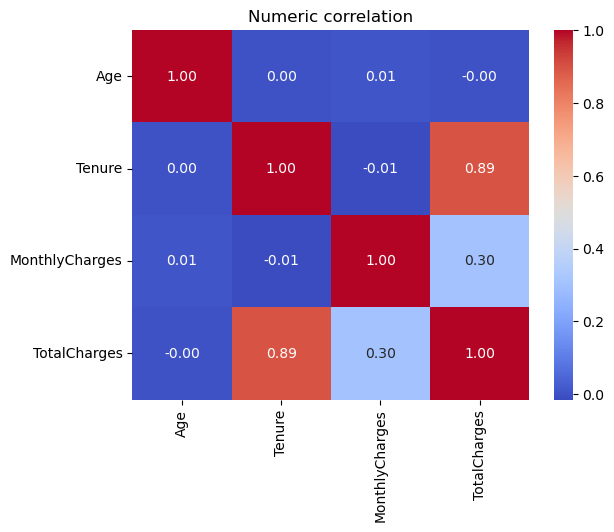

In [53]:
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap='coolwarm', fmt='.2f')
plt.title('Numeric correlation')
plt.show()

In [54]:
df['Churn'].value_counts() ##SMOTE / ADASYN

Churn
Yes    883
No     117
Name: count, dtype: int64

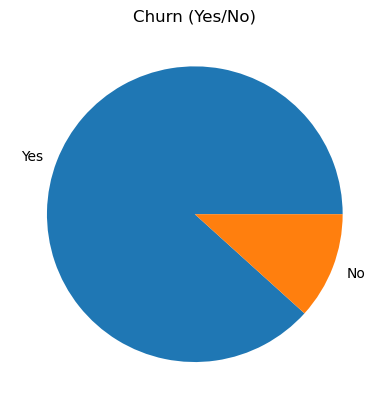

In [55]:
df['Churn'].value_counts().plot(kind='pie')
plt.title('Churn (Yes/No)')
plt.ylabel('')
plt.show()

In [56]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [57]:
df.groupby(['Churn','Gender'])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [58]:
df.groupby('Churn')['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [59]:
df.groupby('Churn')['Age'].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

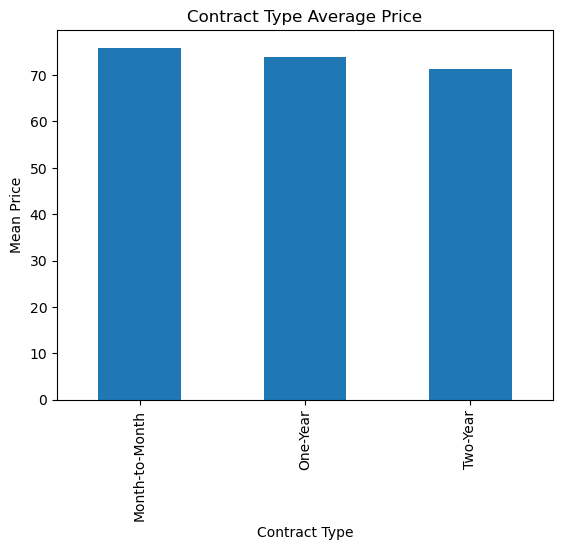

In [60]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind='bar')
plt.title('Contract Type Average Price')
plt.ylabel('Mean Price')
plt.xlabel('Contract Type')
plt.show()

## The monthly charge mean decreases at lower terms.

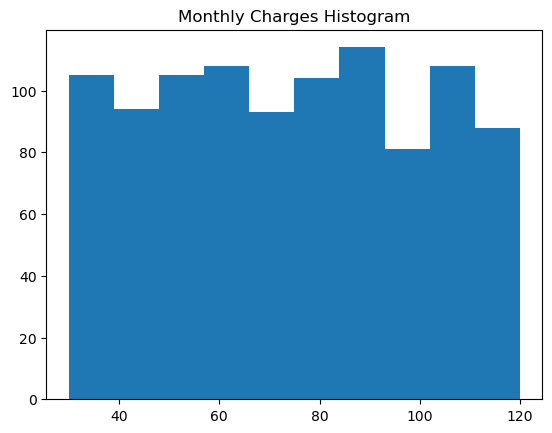

In [61]:
plt.hist(df['MonthlyCharges'])
plt.title('Monthly Charges Histogram')
plt.show()

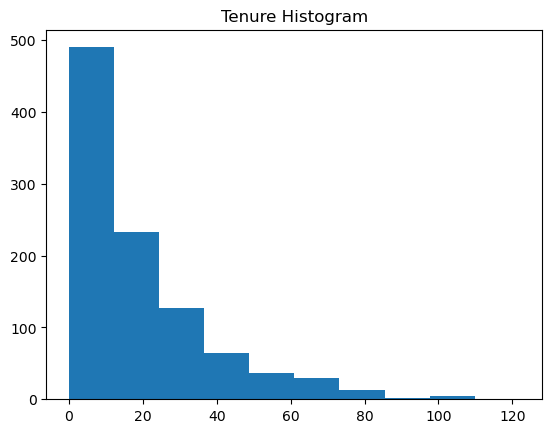

In [62]:
plt.hist(df['Tenure'])
plt.title('Tenure Histogram')
plt.show()

# Feature Engineering

In [63]:
df.dtypes

Age                  int64
Gender              object
Tenure               int64
MonthlyCharges     float64
ContractType        object
InternetService     object
TotalCharges       float64
TechSupport         object
Churn               object
dtype: object

In [64]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
gender_encoded = ohe.fit_transform(df[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=ohe.get_feature_names_out(['Gender']), index=df.index)
X = pd.concat([df[['Age','MonthlyCharges','Tenure']], gender_encoded_df], axis=1)

scaler = StandardScaler()
X[['Age','MonthlyCharges','Tenure']] = scaler.fit_transform(X[['Age','MonthlyCharges','Tenure']])
y = df['Churn']

In [65]:
X.head()

,Age,MonthlyCharges,Tenure,Gender_Female,Gender_Male
0,0.441751,0.543157,-0.792930,0.0,1.0
1,-0.170941,-1.467799,-1.004760,0.0,1.0
2,0.645982,-0.412514,-0.898845,1.0,0.0
3,1.565021,1.087531,-0.581101,1.0,0.0
4,-0.273057,-0.209395,0.689875,0.0,1.0


In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y= le.fit_transform(df['Churn']) #No = 0 , Yes = 1

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 69, stratify=y)

In [68]:
from imblearn.over_sampling import SMOTE #could also use ADAYSYN or any other under/over sampling methods but SMOTE works best :) 

smote = SMOTE(random_state=69)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [69]:
print("Before SMOTE:", pd.Series(y_train).value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())

Before SMOTE: 1    706
0     94
Name: count, dtype: int64
After SMOTE: 1    706
0    706
Name: count, dtype: int64


In [70]:
X_train.shape

(800, 5)

In [71]:
X_test.shape

(200, 5)

In [72]:
X_test.value_counts()

Age        MonthlyCharges  Tenure     Gender_Female  Gender_Male
-2.519596   0.134195       -0.528144  0.0            1.0            1
 0.543867  -0.933931        0.107345  0.0            1.0            1
 0.339636   0.590629        3.973231  0.0            1.0            1
            1.604668        0.795790  1.0            0.0            1
 0.441751  -1.222655       -0.951802  0.0            1.0            1
                                                                   ..
-0.375172  -0.266206        0.583961  0.0            1.0            1
            0.608139        0.213259  0.0            1.0            1
            1.066519        0.425089  0.0            1.0            1
-0.273057  -0.176709        0.954662  1.0            0.0            1
 2.075598  -0.536642        0.054387  0.0            1.0            1
Name: count, Length: 200, dtype: int64

# test without smote to show model accuracy comparison

In [73]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

LogR_nosmote = LogisticRegression(max_iter=1000)

LogR_nosmote.fit(X_train, y_train)
y_pred = LogR_nosmote.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)


print('accuracy score:' , accuracy)
print('f1 score:' , f1)

accuracy score: 0.88
f1 score: 0.9358288770053476


In [74]:
logR = LogisticRegression(max_iter = 1000)

logR.fit(X_train_smote,y_train_smote)
y_pred = logR.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)

print('accuracy score:' , accuracy)
print('f1 score:' , f1)

accuracy score: 0.655
f1 score: 0.770764119601329


In [75]:
from sklearn.metrics import classification_report

# Without SMOTE
y_pred_nosmote = LogR_nosmote.predict(X_test)
print("-----Without SMOTE-----")
print(classification_report(y_test, y_pred_nosmote, target_names=['No', 'Yes']))

# With SMOTE
y_pred_smote = logR.predict(X_test)
print("-----With SMOTE-----")
print(classification_report(y_test, y_pred_smote, target_names=['No', 'Yes']))

-----Without SMOTE-----
              precision    recall  f1-score   support

          No       0.33      0.04      0.08        23
         Yes       0.89      0.99      0.94       177

    accuracy                           0.88       200
   macro avg       0.61      0.52      0.51       200
weighted avg       0.82      0.88      0.84       200

-----With SMOTE-----
              precision    recall  f1-score   support

          No       0.20      0.65      0.30        23
         Yes       0.94      0.66      0.77       177

    accuracy                           0.66       200
   macro avg       0.57      0.65      0.54       200
weighted avg       0.85      0.66      0.72       200



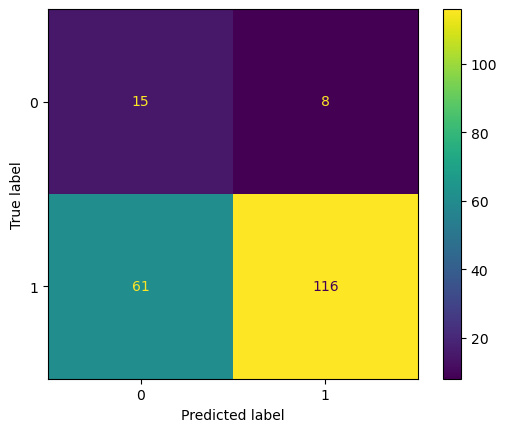

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

True Negatives (TN) = 19 → correctly predicted No

False Positives (FP) = 4 → incorrectly predicted Yes

False Negatives (FN) = 67 → incorrectly predicted No

True Positives (TP) = 110 → correctly predicted Yes

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models ={
    'Decision Tree': DecisionTreeClassifier(random_state=69),
    'Random Forest': RandomForestClassifier(random_state=69),
    'Gradient Boosting': GradientBoostingClassifier(random_state=69),
    'Adaboost': AdaBoostClassifier(random_state=69), 
    'SVM': SVC(probability=True, random_state=69),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss',random_state=69)
}

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    print(f"----{name}-----")
    print('Accuracy: ', accuracy_score(y_test,y_pred))
    print('F1 score: ' , f1_score(y_test,y_pred))
    print()

----Decision Tree-----
Accuracy:  0.76
F1 score:  0.8579881656804734

----Random Forest-----
Accuracy:  0.755
F1 score:  0.851963746223565

----Gradient Boosting-----
Accuracy:  0.74
F1 score:  0.8364779874213837

----Adaboost-----
Accuracy:  0.69
F1 score:  0.7876712328767124

----SVM-----
Accuracy:  0.67
F1 score:  0.7857142857142857

----KNN-----
Accuracy:  0.71
F1 score:  0.8141025641025641

----XGBoost-----
Accuracy:  0.785
F1 score:  0.8731563421828908



In [78]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=69)

rfc_params ={
    'n_estimators':[100,200],
    'max_depth':[None, 5,10],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2]}

grid_rfc = GridSearchCV(
    estimator=rfc, 
    param_grid=rfc_params,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1)

grid_rfc.fit(X_train_smote, y_train_smote)
print("Best RFC params:" , grid_rfc.best_params_)
print('Best RFC F1: ', grid_rfc.best_score_)
y_pred = grid_rfc.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1:", f1_score(y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best RFC params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RFC F1:  0.8930238672269206
Test Accuracy: 0.755
Test F1: 0.851963746223565


In [79]:
gb = GradientBoostingClassifier(random_state=69)

gb_params ={
    'n_estimators':[100,200],
    'learning_rate':[0.05,0.1],
    'max_depth':[3,5]}

grid_gb = GridSearchCV(
    estimator = gb,
    param_grid=gb_params,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1)

grid_gb.fit(X_train_smote,y_train_smote)
print("Best GB params:", grid_gb.best_params_)
print("Best GB F1:", grid_gb.best_score_)
y_pred = grid_gb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1:", f1_score(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best GB params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best GB F1: 0.8861248876905841
Test Accuracy: 0.76
Test F1: 0.8571428571428571


In [80]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=69)

xgb_params={
    'n_estimators':[100,200],
    'learning_rate':[0.05,0.1],
    'max_depth':[3,5],
    'subsample':[0.7,1],
    'colsample_bytree':[0.7,1]}
grid_xgb = GridSearchCV(
    estimator = xgb_model,
    param_grid=xgb_params,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1)
grid_xgb.fit(X_train_smote,y_train_smote)
print("Best XBG Params:", grid_xgb.best_params_)
print("Best XGB F1:" ,grid_xgb.best_score_)
y_pred = grid_xgb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1:", f1_score(y_test, y_pred))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best XBG Params: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}
Best XGB F1: 0.8865303048275596
Test Accuracy: 0.79
Test F1: 0.8764705882352941


In [81]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Random Forest Randomized Search
rfc = RandomForestClassifier(random_state=69)

rfc_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

rand_rfc = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=rfc_dist,
    n_iter=20,
    scoring='f1',
    cv=5,
    random_state=69,
    n_jobs=-1,
    verbose=1)

rand_rfc.fit(X_train_smote, y_train_smote)
print("Best RF params (Random):", rand_rfc.best_params_)
print("Best RF F1 (Random):", rand_rfc.best_score_)
y_pred = rand_rfc.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1:", f1_score(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best RF params (Random): {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 226}
Best RF F1 (Random): 0.8656069914097024
Test Accuracy: 0.735
Test F1: 0.8359133126934984


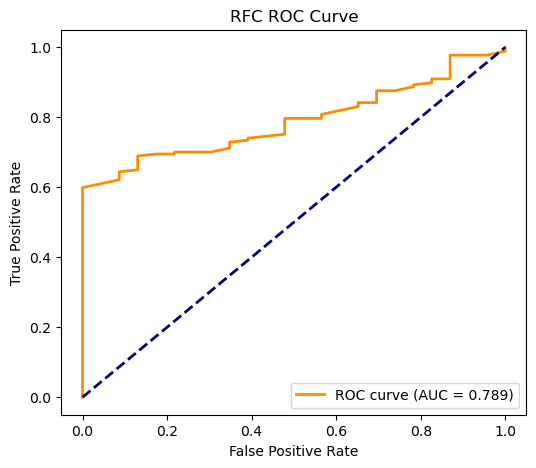

In [82]:
from sklearn.metrics import roc_curve, auc

best_rfc = grid_rfc.best_estimator_

y_prob = best_rfc.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC ROC Curve')
plt.legend(loc='lower right')
plt.show()

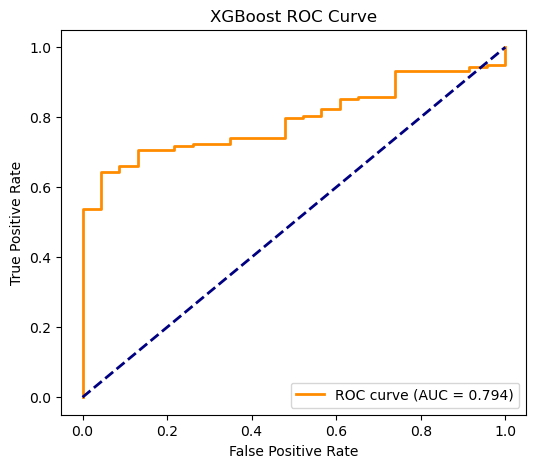

In [83]:
from sklearn.metrics import roc_curve, auc

best_xgb = grid_xgb.best_estimator_

y_prob = best_xgb.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.show()

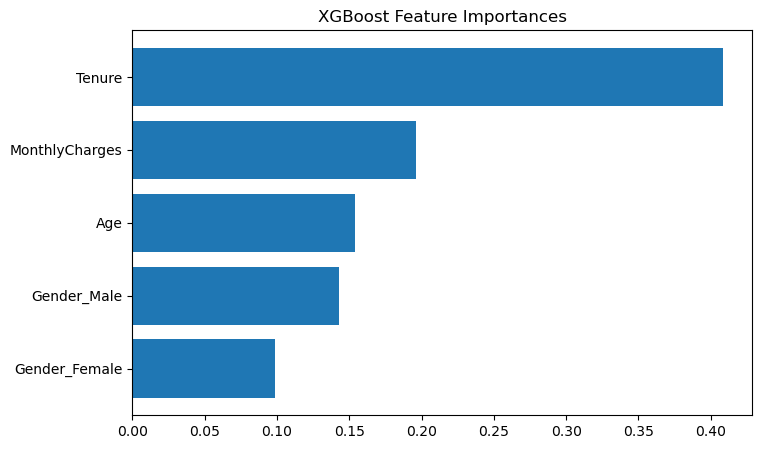

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

importances = best_xgb.feature_importances_
features = X_train.columns

feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.gca().invert_yaxis()
plt.title('XGBoost Feature Importances')
plt.show()

### Moving to streamlit now

In [93]:
import joblib
joblib.dump(best_xgb, 'xgb_best_model.pkl')

['xgb_best_model.pkl']

In [92]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [95]:
joblib.dump(ohe, 'ohe.pkl')

['ohe.pkl']